total_acc = 72
total_acc = 144
total_acc = 211
total_acc = 288
total_acc = 363
total_acc = 435
total_acc = 512
total_acc = 588
total_acc = 660
total_acc = 740
74.0
total_acc = 73
total_acc = 147
total_acc = 217
total_acc = 292
total_acc = 366
total_acc = 441
total_acc = 519
total_acc = 600
total_acc = 674
total_acc = 752
75.2
total_acc = 78
total_acc = 157
total_acc = 230
total_acc = 311
total_acc = 394
total_acc = 473
total_acc = 554
total_acc = 635
total_acc = 711
total_acc = 793
79.3
total_acc = 72
total_acc = 149
total_acc = 220
total_acc = 298
total_acc = 380
total_acc = 456
total_acc = 535
total_acc = 621
total_acc = 698
total_acc = 777
77.7
total_acc = 79
total_acc = 153
total_acc = 229
total_acc = 308
total_acc = 394
total_acc = 473
total_acc = 549
total_acc = 633
total_acc = 706
total_acc = 792
79.2
total_acc = 78
total_acc = 158
total_acc = 233
total_acc = 309
total_acc = 391
total_acc = 470
total_acc = 547
total_acc = 627
total_acc = 706
total_acc = 785
78.5
total_acc = 79
t

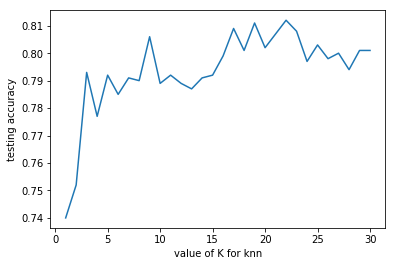

In [6]:
import csv
import numpy as np
import math
import random
import operator
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# each train file has 100 instances
# with 64 attributes

# function to import train data
def importData(file):
    data = []
    csvFile = open(file, "r")
    csv_reader = csv.reader(csvFile, delimiter=',')
    
    for row in csv_reader:
        tmp = []
        for col in row:
            tmp.append(col)
        data.append(tmp)
        
    return data

# function to calculate Euclidean distance
def euclidean(data1, data2):
    ret = 0
    for i in range(0, 64):
        ret += (float(data1[i]) - float(data2[i]))**2
    return math.sqrt(ret)

# function about k nearest neighbour
def knn(k, xTrain, xValidation, yTrain, yValidation):
    matches = 0
    for i in range(0, len(xValidation)):
        # label[0] represents # of 5, label[1] represents # of 6
        label = [0,0]
        distList = []
        result = 0
        correctLabel = yValidation[i][0]
        
        for j in range(0, len(xTrain)):
            dist = euclidean(xValidation[i], xTrain[j])
            distList.append([dist, yTrain[j][0]])
        random.shuffle(distList)
        distList.sort(key = operator.itemgetter(0))
        
        for l in range(0, k):
            if distList[l][1] == "5":
                label[0] += 1
            elif distList[l][1] == "6":
                label[1] += 1
        
        if label[0] > label[1]:
            result = 5
        elif label[0] < label[1]:
            result = 6
        else:
            result = random.choice([5,6])
        
        if int(result) == int(correctLabel):
            matches += 1
    return matches
                



# import train data & labels
X = []
Y = []
for i in range(1, 11):
    X += importData("trainData" + str(i) + ".csv")
    Y += importData("trainLabels" + str(i) + ".csv")
X = np.array(X)
Y = np.array(Y)

#import test data & labels
x = importData("testData.csv")
y = importData("testLabels.csv")

# 10-fold validation initialize
kf = KFold(n_splits=10)

K = 0
bestAvg = 0
k_range = range(1,31)
score_list = []

for i in k_range:
    total_acc = 0
    for train_index, test_index in kf.split(X):
        #print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        total_acc += knn(i, X_train, X_test, Y_train, Y_test)
    avg = total_acc / 10
    if avg > bestAvg:
        bestAvg = avg
        K = i
    print(avg)
    score_list.append(avg/100)
    
print("---------------result----------------") 
print("best k is " + str(K))

acc = knn(K, X, x, Y, y)

print("accuracy is " + str(float(100*acc/110))+'%')

plt.plot(k_range, score_list)
plt.xlabel("value of K for knn")
plt.ylabel("testing accuracy")
plt.show()